# 14. 다양한 데이터 전처리 기법

# Load Library

In [5]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
import os
csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
df = pd.read_csv(csv_file_path)
print(df.shape)
df.head()

(199, 8)


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


In [6]:
profile = df.profile_report()
profile

In [8]:
len(df) - df.count()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [9]:
df = df.drop('기타사항', axis=1)
df.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [10]:
df[df.isnull().any(axis =1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [13]:
df[df.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


In [14]:
df.loc[191, '수출금액'] = (df.loc[188, '수출금액'] + df.loc[194, '수출금액'] )/2
df.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [16]:
df.loc[191, '무역수지'] = (df.loc[188, '무역수지'] + df.loc[194, '무역수지'] )/2
df.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5


In [ ]:
df[(df['기간']=='2020년 03월')&(df['국가명']=='중국')]

In [17]:
df.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [18]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [19]:
df.loc[outlier(df, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


# Data Profile

###### 요약 

1. 총 800 row, 13 columns
2. Type 2 Columns 에 null 값이 있다. 386/800

###### Columns 설명
* #: ID for each pokemon
  * 각 포켓몬의 고유한 ID 값이다.
  * 1번부터 721번까지 있다.
  * 479번, 386번, 710, 711번처럼 중복되는 값이 있다.


* Name: Name of each pokemon
  * 각 포켓몬의 고유한 이름이다.
  * 800개의 고유한 이름이 있다.
  * 같은 ID 값을 가지지만, 이름은 서로 다른 포켓몬이 있다.


* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
  * 각 포켓몬이 가진 속성값이다.
  * 속성별 상성이 존재한다.
  * 총 18개의 상성이 있다.
  * Water, Normal, Grass ... 의 순서로 Water 속성을 가진 포켓몬이 제일 많다.


* Type 2: Some pokemon are dual type and have 2
  * 몇몇 포켓몬은 두 가지 속성을 가진다. 414/800 (52.8%)
  * Flying, Ground, Poison ...의 순서로 Flying 속성을 가진 포켓몬이 제일 많다.


* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
  * 포켓몬의 모든 능력치의 합이다.
  * 최솟값 ~ 최댓값 (180 ~ 780)
  * 600, 405, 500, 580 등 특정 값에 중복이 많다


* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
  * 체력 능력치
  * 최솟값 ~ 최댓값 (1 ~ 255)
  * 50~80 사이에 많이 분포


* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
  * 일반 공격력 능력치 (할퀴기, 때리기 등)
  * 최솟값 ~ 최댓값 (5 ~ 190)
  

* Defense: the base damage resistance against normal attacks
  * 일반 방어력 능력치 (일반 공격에 대한 방어)
  * 최솟값 ~ 최댓값 (5 ~ 230)
  * 해당 능력치가 특출한 포켓몬이 있다.
  

* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
  * 특수 공격력 능력치 (불대문자, 거품광선 등)
  * 최솟값 ~ 최댓값 (10 ~ 194)


* SP Def: the base damage resistance against special attacks
  * 특수 방어력 능력치 (특수 공격에 대한 방어)
  * 최솟값 ~ 최댓값 (20 ~ 230)
  * 해당 능력치가 특출한 포켓몬이 있다.
  

* Speed: determines which pokemon attacks first each round 
  * 속도 능력치 각 라운드마다 각 포켓몬의 선제 공격권을 결정한다.
  * 최솟값 ~ 최댓값 (5 ~ 180)
  
  
* Generation
  * 포켓몬 세대
  * 총 6세대까지 있다.
  * 세대별 포켓몬 수가 다르다.
  
  
* Legendary
  * 전설 포켓몬 여부 (65/800 8.1%)

## 일반 포켓몬과 전설 포켓몬을 분류해보기

#### 전설 포켓몬: 포켓몬스터 시리즈에 등장하는 포켓몬 중에서도 일종의 신이나 영물 취급을 받는 포켓몬의 통칭이다.
* 일반 포켓몬 보다 희귀하고, 특징이 있을 것 같다.
* 전설 포켓몬의 특징을 찾는 것부터 시작해보자!

#### 궁금한 사항

1. 일반 포켓몬보다 전설 포켓몬이 더 강할까?
2. 각 세대별로 전설 포켓몬의 특징이 있을까?

### 궁금한 사항 1. 일반 포켓몬보다 전설 포켓몬이 더 강할까?

In [3]:
# Total Columns를 통해 포켓몬의 일반적인 강함 정도를 알 수 있다.
# 일반 포켓몬과 전설 포켓몬의 Total 값을 알아보자
# 일반 포켓몬과 전설 포켓몬의 각 능력치별 값을 알아보자

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

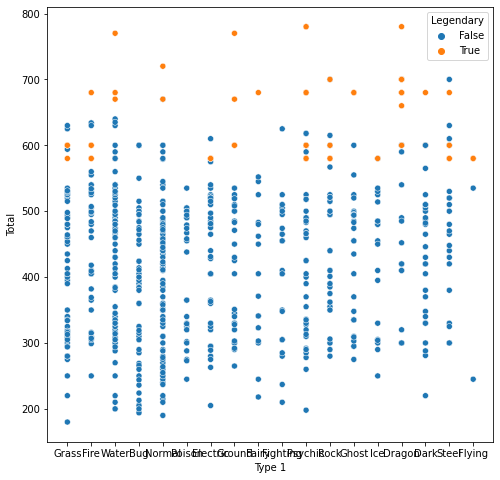

In [4]:
plt.figure(figsize= [8, 8])
sns.scatterplot(data = df, x = 'Type 1', y = 'Total', hue = 'Legendary' )

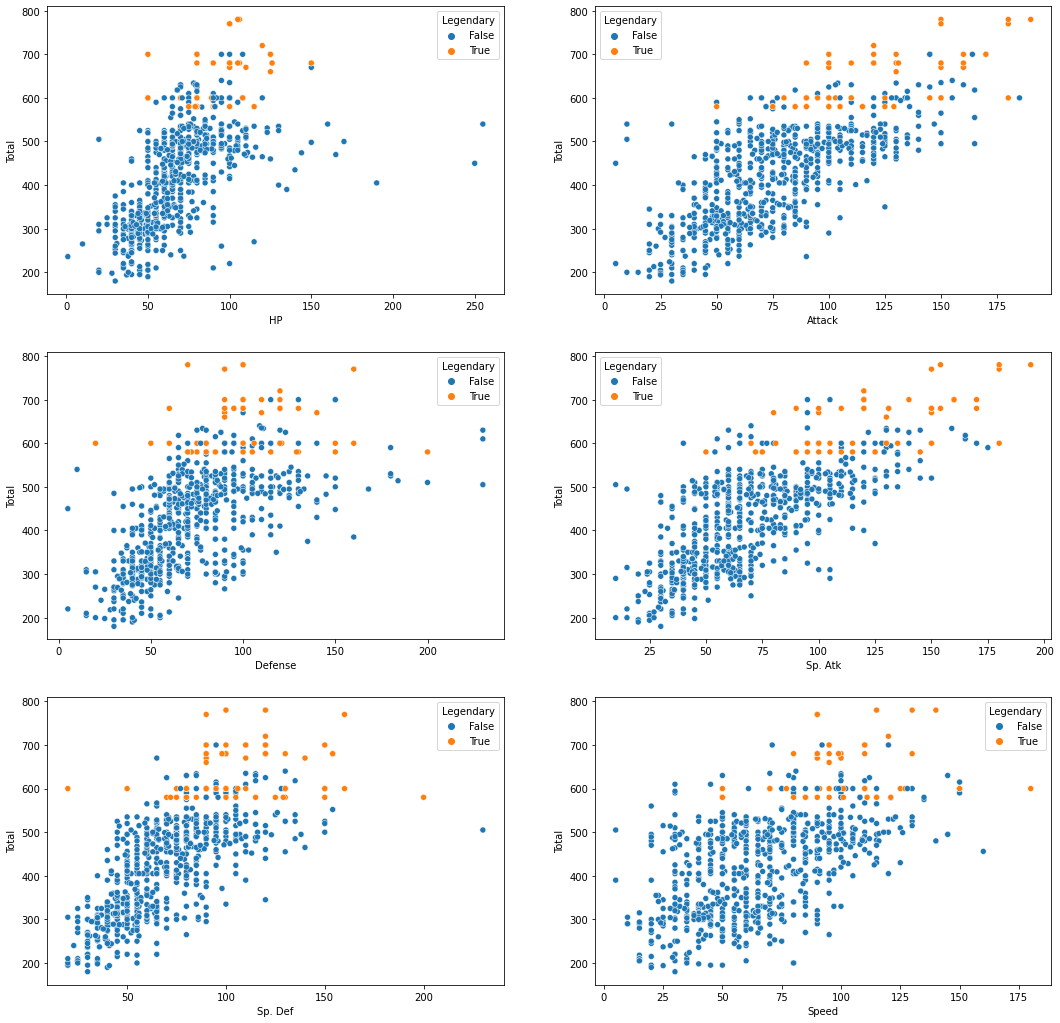

In [5]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

sns.scatterplot(data=df, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=df, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=df, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=df, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=df, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=df, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

In [6]:
# 전설 포켓몬은 Total 능력치를 봤을 땐 500 후반대이다.
# 전설 포켓몬의 각각의 능력치 중 현저하게 낮거나 높은 능력치가 있다.

In [7]:
pd.pivot_table(data = df, index = 'Legendary', values = 'Total', aggfunc = [np.min, np.max])

,amin,amax
,Total,Total
Legendary,,
False,180,700
True,580,780


In [8]:
# 일반 포켓몬이면서 Total 능력치가 700이상인 포켓몬은 어떤 특징을 가질까?

In [9]:
df[(df['Total'] >= 580) & (df['Legendary'] == False)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False


In [10]:
# Name에 Mega가 들어가 있다!
# Mega는 뭐지?

**메가진화:**
메가진화란 숨겨진 힘을 일시적으로 개방하여 일반적인 진화로는 있을 수 없는 힘을 발휘하는 것이다. 그리고, 뮤츠와 리자몽은 2종류의 메가진화를 가진다. 닌텐도 드림 2013년 11월호의 마스다 준이치 & 모리모토 시게키 인터뷰에 의하면 메가진화한 포켓몬은 전설의 포켓몬 수준으로 강해진다고 한다.

In [11]:
# 전설 포켓몬 중에 Name에 Mega가 들어있는 포켓몬의 특징은?
df[ (df['Legendary'] == True) & (df['Name'].str.contains('Mega'))]
# Total이 700 이상이다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True


In [12]:
# 이름에 Mega가 안 들어간 포켓몬의 특징은?
df[(df['Total'] >= 580) & (df['Legendary'] == False) & (df['Name'].str.contains('Mega') == False)]

# Name에 'Forme'가 포함되어 있다.
# 일부 포켓몬은 각 능력치가 모두 100이다.
# Total 670 아웃라이어를 제외하고 580~600 사이이다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
408,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False


In [32]:
# Name에 'Forme'가 포함되어 있는 전설 포켓몬은?
df_forme = df[(df['Name'].str.contains('Forme'))]
df_forme['Legendary'].value_counts()
# 'Forme'가 포함된 전설 포켓몬이 더 많다.

True     15
False     6
Name: Legendary, dtype: int64

In [38]:
# 각 능력치가 모두 100인 전설 포켓몬은?
df_100 = df[(df['HP'] == 100) & (df['Attack'] == 100) & (df['Defense'] == 100) & (df['Sp. Atk'] == 100)
           & (df['Sp. Def'] == 100) & (df['Speed'] == 100)]
df_100['Legendary'].value_counts()
# 각 3마리씩 있다.

True     3
False    3
Name: Legendary, dtype: int64

In [40]:
# Total이 580~600 사이인 포켓몬들 중 전설포켓몬의 숫자는?
df_580_600 = df[(df['Total'] >= 580) & (df['Total'] <= 600)]
df_580_600['Legendary'].value_counts()

True     37
False    28
Name: Legendary, dtype: int64

In [54]:
print(df_580_600.shape)
df_580_600.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False


In [61]:
pd.pivot_table(data = df_580_600, index = ['Legendary', 'Type 1', 'Type 2'])
# 일반 포켓몬에만 있는 타입 Bug, Ghost, Normal / Dragon+Flying / Rock + Dark 등등
# 전설 포켓몬에만 있는 타입 Fire, Flying 등등
# 타입이 가장 큰 특성 분류

#      Attack  Defense  Generation  \
Legendary Type 1   Type 2                                                  
False     Bug      Fighting  214.000000  185.000000    115.0    2.000000   
                   Flying    127.000000  155.000000    120.0    1.000000   
                   Steel     430.500000  135.000000    117.5    3.500000   
          Dark     Dragon    635.000000  105.000000     90.0    5.000000   
                   Fire      229.000000   90.000000     90.0    2.000000   
          Dragon   Fairy     334.000000  110.000000    110.0    3.000000   
                   Flying    261.000000  134.500000     87.5    2.000000   
                   Ground    445.000000  130.000000     95.0    4.000000   
          Ghost    Poison     94.000000   65.000000     80.0    1.000000   
          Grass    Ice       460.000000  132.000000    105.0    4.000000   
          Normal   Fighting  538.000000  132.000000     92.0    4.500000   
                   Psychic   648.000000   77.000000     77.0    5.000000   
          Psychic  Grass     251.000000  100.000000    100.0    2.000000   
          Rock     Dark      248.000000  134.000000    110.0    2.000000   
          Steel    Psychic   376.000000  135.000000    130.0    3.000000   
          Water    Fighting  647.000000   72.000000     90.0    5.000000   
                   Psychic    80.000000   75.000000    180.0    1.000000   
True      Dragon   Ground    718.000000  100.000000    121.0    6.000000   
                   Psychic   380.500000   85.000000     85.0    3.000000   
          Electric Flying    476.333333  103.333333     75.0    3.666667   
          Fire     Flying    146.000000  100.000000     90.0    1.000000   
                   Steel     485.000000   90.000000    106.0    4.000000   
                   Water     721.000000  110.000000    120.0    6.000000   
          Grass    Fighting  640.000000   90.000000     72.0    5.000000   
                   Flying    492.000000  103.000000     75.0    4.000000   
          Ground   Flying    645.000000  135.000000     90.0    5.000000   
          Ice      Flying    144.000000   85.000000    100.0    1.000000   
          Psychic  Fire      494.000000  100.000000    100.0    5.000000   
                   Ghost     720.000000  110.000000     60.0    6.000000   
          Rock     Fairy     719.000000  100.000000    150.0    6.000000   
                   Fighting  639.000000  129.000000     90.0    5.000000   
          Steel    Fighting  638.000000   90.000000    129.0    5.000000   
                   Psychic   385.000000  100.000000    100.0    3.000000   

                                     HP     Sp. Atk     Sp. Def  Speed  Total  
Legendary Type 1   Type 2                                                      
False     Bug      Fighting   80.000000   40.000000  105.000000   75.0    600  
                   Flying     65.000000   65.000000   90.000000  105.0    600  
                   Steel      70.500000   92.500000   97.500000   87.0    600  
          Dark     Dragon     92.000000  125.000000   90.000000   98.0    600  
                   Fire       75.000000  140.000000   90.000000  115.0    600  
          Dragon   Fairy      75.000000  110.000000  105.000000   80.0    590  
                   Flying     93.000000  105.000000   90.000000   90.0    600  
                   Ground    108.000000   80.000000   85.000000  102.0    600  
          Ghost    Poison     60.000000  170.000000   95.000000  130.0    600  
          Grass    Ice        90.000000  132.000000  105.000000   30.0    594  
          Normal   Fighting   82.500000   65.500000   86.500000  131.5    590  
                   Psychic   100.000000  128.000000  128.000000   90.0    600  
          Psychic  Grass     100.000000  100.000000  100.000000  100.0    600  
          Rock     Dark      100.000000   95.000000  100.000000   61.0    600  
          Steel    Psychic    80.000000   95.000000   90.000000   70.0    600  
          Water  

### 결론: 궁금한 사항 1. 일반 포켓몬보다 전설 포켓몬이 더 강할까?

* 전설 포켓몬의 Total 능력치는 모두 580이상이다.
* Name에 'Mega'가 들어가면서 Total 능력치가 700미만이면 일반 포켓몬이다.
* 580~600 사이 포켓몬의 특성 조합이 다르다

# PRE PROCESSING

In [116]:
# Type 2 NaN 값 바꾸기
df['Type 2'] = df['Type 2'].fillna('NoType')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,False


In [117]:
# Mega
df['Mega'] = df['Name'].str.contains('Mega')
print(df.shape)
df[['Mega']].head()

(800, 14)


,Mega
0,False
1,False
2,False
3,True
4,False


In [118]:
# OverPower, OverPower_700
df['OP'] = df['Total'] >= 580
df['OP_700'] = df['Total'] >= 700
print(df.shape)
df[['Total','OP', 'OP_700']].head()

(800, 16)


,Total,OP,OP_700
0,318,False,False
1,405,False,False
2,525,False,False
3,625,True,False
4,309,False,False


# Data Cleaning

In [129]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [130]:
# one hot 인코딩 -> 문자열 값을 모델링을 위해 숫자로 변환
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

print(df_num.shape)
df_num.head()

(800, 16)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,OP,OP_700
0,1,80,9,14,318,45,49,49,65,65,45,1,False,False,False,False
1,2,329,9,14,405,60,62,63,80,80,60,1,False,False,False,False
2,3,745,9,14,525,80,82,83,100,100,80,1,False,False,False,False
3,3,746,9,14,625,80,100,123,122,120,80,1,False,True,True,False
4,4,102,6,12,309,39,52,43,60,50,65,1,False,False,False,False


# Feature Engineering

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
features = ['Total', 'Type 1', 'Type 2', 'Mega', 'OP', 'OP_700']
target = 'Legendary'

In [136]:
X = df_num[features]
print(X.shape)
X.head()

(800, 6)


,Total,Type 1,Type 2,Mega,OP,OP_700
0,318,9,14,False,False,False
1,405,9,14,False,False,False
2,525,9,14,False,False,False
3,625,9,14,True,True,False
4,309,6,12,False,False,False


In [137]:
y = df_num[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 6) (640,)
(160, 6) (160,)


# Model Tuning & Evaluation

In [162]:
# 모듈 import
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}

# 2. 사용할 데이터 import
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

data_list =  {'breast_cancer': load_breast_cancer(),
             'wine': load_wine(),
             'digits': load_digits()}


# 3. 함수로 만들어 보기
def run():

    for model_name, model in models_list.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(model_name)
        print(accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print('------------------------------'*2)
        
#         fig, axes = plt.subplots(nrows = 1, ncols =1)
#         fig.set_size_inches(12, 10)
#         sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = axes)

In [163]:
run()

DecisionTreeClassifier
0.96875
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       147
        True       0.79      0.85      0.81        13

    accuracy                           0.97       160
   macro avg       0.89      0.91      0.90       160
weighted avg       0.97      0.97      0.97       160

[[144   3]
 [  2  11]]
------------------------------------------------------------
RandomForestClassifier
0.975
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       147
        True       0.76      1.00      0.87        13

    accuracy                           0.97       160
   macro avg       0.88      0.99      0.93       160
weighted avg       0.98      0.97      0.98       160

[[143   4]
 [  0  13]]
------------------------------------------------------------
svm
0.95
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       147


/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 결과

* RandomForestClassifier 모델의 결과 recall 값이 1.0이 나왔다.

In [166]:
[[143,4],
 [0,  13]]

[[143, 4], [0, 13]]